vmin -3.30, vmax 3.30, inc 0.30


/home/david/anaconda3/lib/python3.7/site-packages/mpl_toolkits/basemap/__init__.py:5096: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return npsel.concatenate((a,a[slicer]),axis=axis)
/home/david/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  s)


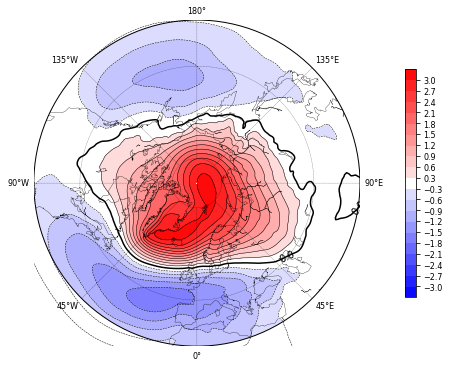

22


In [4]:
def draw_round_frame(m, width_percent=0.05, degree=45):
    # Adapted from:
    # https://stackoverflow.com/questions/47431242/matplotlib-create-lat-lon-white-black-round-bounding-box-around-basemap
    from matplotlib.patches import Wedge
    import matplotlib.pyplot as plt
    ax = plt.subplot(111)
    centre_x = (ax.get_xlim()[0] + ax.get_xlim()[1]) / 2
    centre_y = (ax.get_ylim()[0] + ax.get_ylim()[1]) / 2
    width = abs(centre_x) * width_percent

    inner_radius = abs(centre_x) - width/2
    outer_radius = inner_radius + width

    angle_breaks = list(range(0, 361, degree))

    for i, (from_angle, to_angle) in enumerate(list(zip(angle_breaks[:-1], angle_breaks[1:]))):
        color='white' if i%2 == 0 else 'black'
        wedge = Wedge((centre_x, centre_y), outer_radius, from_angle, to_angle, width=outer_radius - inner_radius, 
                      facecolor=color,
                      edgecolor='black',
                      clip_on=False,
                      ls='solid',
                      lw=1)
        ax.add_patch(wedge)
        
def myround(x, prec=1, base=.5):
    return round(base * round(float(x)/base),prec)

def myround50(x, prec=1, base=50):
    return round(base * round(float(x)/base),prec)

def myround100(x, prec=1, base=100):
    return round(base * round(float(x)/base),prec)

def myround01(x, prec=1, base=.1):
    return round(base * round(float(x)/base),prec)
        
def polaranom(lat,lon,var,vmin=0,vmax=0,inc=0,lat0=0,frame=0,rtitle='',ltitle='',clabel='',
              zeroline=0,cmap='RdBu_r',contours=0,hemisphere='N',fontsize=8,show0=0,
              resolution='c',figsize=(8,6),triangle=1):
    # Libraries
    import numpy as np
    from mpl_toolkits.basemap import Basemap, addcyclic
    import matplotlib.pyplot as plt
    from matplotlib import cm
    
    figure=plt.figure(figsize=figsize)
    ax = figure.add_subplot(111)
      
    if vmin==0 or vmax==0 or inc==0:
        mymin=np.float(np.min(var))
        mymax=np.float(np.max(var))
        if abs(mymin)>abs(mymax):
            vmin=mymin
            vmax=-mymin
        else:
            vmin=-mymax
            vmax=mymax
        if abs(vmax)>1 and abs(vmax)<10 and myround(vmax)>vmax:
            vmax=myround(vmax)
            vmin=myround(vmin)
            if ((vmax*10)%10)==0:
                inc=vmax/10
            else:
                inc=0.5
        elif abs(vmax)>1 and abs(vmax)<10 and myround(vmax)<vmax:
            vmax=myround(vmax)
            vmin=myround(vmin)
            if ((vmax*10)%10)==0:
                inc=vmax/10
            else:
                inc=0.5
            vmax=vmax+inc
            vmin=vmin-inc
        elif abs(vmax)>10 and abs(vmax)<100 and round(vmax,0)>vmax:
            vmax=round(vmax,0)
            vmin=round(vmin,0)
            inc=vmax/10
        elif abs(vmax)>10 and abs(vmax)<100 and round(vmax,0)<vmax:
            vmax=round(vmax,0)
            vmin=round(vmin,0)
            inc=vmax/10
            vmax=vmax+inc
            vmin=vmin-inc
        elif abs(vmax)>=100 and abs(vmax)<500 and myround50(vmax,0)>vmax:
            vmax=myround50(vmax)
            vmin=myround50(vmin)
            inc=50
        elif abs(vmax)>=100 and abs(vmax)<500 and myround50(vmax,0)<vmax:
            vmax=myround50(vmax)
            vmin=myround50(vmin)
            inc=50
            vmax=vmax+inc
            vmin=vmin-inc
        elif abs(vmax)>=500 and abs(vmax)<1000 and myround50(vmax,0)>vmax:
            vmax=myround50(vmax)
            vmin=myround50(vmin)
            if (vmax%100)==0:
                inc=100
            else:
                vmax=vmax+50
                vmin=vmin-50
                inc=100
        elif abs(vmax)>=500 and abs(vmax)<1000 and myround50(vmax,0)<vmax:
            vmax=myround50(vmax)
            vmin=myround50(vmin)
            if (vmax%100)==0:
                inc=100
            else:
                inc=50
            vmax=vmax+inc
            vmin=vmin-inc
            if (vmax%100)==0:
                inc=100
            else:
                inc=50
        elif abs(vmax)>=1000 and myround100(vmax,0)>vmax:
            vmax=myround100(vmax)
            vmin=myround100(vmin)
            inc=vmax/10
        elif abs(vmax)>=1000 and myround100(vmax,0)<vmax:
            vmax=myround100(vmax)
            vmin=myround100(vmin)
            inc=vmax/10
            vmax=vmax+inc
            vmin=vmin-inc
        elif abs(vmax)>=0.1 and abs(vmax)<=1 and myround01(vmax,0)>vmax:
            vmax=myround01(vmax)
            vmin=myround01(vmin)
            inc=vmax/10
        elif abs(vmax)>=0.1 and abs(vmax)<=1 and myround01(vmax,0)<vmax:
            vmax=myround01(vmax)
            vmin=myround01(vmin)
            inc=myround01(vmax)/10
            vmax=vmax+inc
            vmin=vmin-inc
        else:
            inc=vmax/10
        var[np.where(var>=vmax)]=vmax-inc
        var[np.where(var<=vmin)]=vmin+inc
        print('vmin %.2f, vmax %.2f, inc %.2f' %(vmin,vmax,inc))
            
    if show0==1:    
        ncolors=np.shape(np.arange(vmin,vmax,inc))[0]
        levels=np.arange(vmin,vmax+inc,inc)
    elif show0==0:
        ncolors=np.shape(np.arange(vmin,vmax,inc))[0]-1
        neglevs=np.arange(vmin,0,inc)
        poslevs=np.arange(inc,vmax+inc,inc)
        levels=np.concatenate((neglevs,poslevs))
    else:
        print('Invalid option: show0 arg. must be 0 or 1.')
        return figure
        
    var_c, lon_c = addcyclic(var, lon)
    
    if hemisphere=='N' or hemisphere=='n':
        proj='npstere'
    elif hemisphere=='S' or hemisphere=='s':
        proj='spstere'
    else:
        print('Invalid hemisphere: should be "N" or "S".')
        return figure
    m = Basemap(projection=proj,lat_0=90,lon_0=0,boundinglat=lat0,resolution=resolution,round=True)
    x, y = m(*np.meshgrid(lon_c,lat))

    if len(levels)>22 and len(levels)<49 and show0==0:
        #cblevels=levels[1:-1:2]
        cblevels=np.concatenate((levels[1:int((len(levels)/2)+1):2],levels[int(len(levels)/2):-1:2]))
    elif len(levels)<=22 and show0==0:
        from matplotlib.colors import ListedColormap
        viridis = cm.get_cmap(cmap, 256)
        newcolors = viridis(np.linspace(0, 1, 256))
        white = np.array([1, 1, 1, 1])
        newcolors[int(256/2)-1:int(256/2)+1, :] = white
        newcmp = ListedColormap(newcolors)
        cbar=cm.get_cmap(newcmp,ncolors)
        cblevels=levels[1:-1]
    elif len(levels)<=22 and show0==1:
        cbar=cm.get_cmap(cmap,ncolors)
        cblevels=levels[1:-1]
    else:
        cbar=cm.get_cmap(cmap,ncolors)
        cblevels=levels[1:-1:2]
        
    m.contourf(x,y,var_c,levels=levels,cmap=cbar)
    m.drawcoastlines(linewidth=0.3)
    m.drawmeridians(np.arange(0, 359, 45), labels=[1,1,0,0],linewidth=0.30, fontsize=fontsize)
    m.drawparallels(np.arange(-90, 91, 45),linewidth=0.3)
        
    cb=plt.colorbar(shrink=0.7,pad=0.1,ticks=cblevels,label=clabel)
    cb.ax.tick_params(labelsize=fontsize)
    if zeroline==1:
        m2=plt.contour(x,y,var_c,levels=[0],colors='k',add_colorbar=False)
        plt.clabel(m2, m2.levels, inline=False, fontsize=10, fmt='%.1f')
    if frame==1:
        draw_round_frame(m)
    if contours==1:
        plt.contour(x,y,var_c,levels=levels,colors='k',linewidths=0.5)
    plt.title(rtitle,loc='left')
    plt.title(ltitle,loc='right')
    plt.show()
    print(len(levels))
    return figure

# Simple plot, automatic color range and no customizations:
myfig=polaranom(mylat,mylon,myvar,cmap='bwr',show0=0,
               lat0=30,zeroline=1,contours=1,
                )
myfig.savefig('test1.png', dpi=300)

/home/david/anaconda3/lib/python3.7/site-packages/mpl_toolkits/basemap/__init__.py:5096: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return npsel.concatenate((a,a[slicer]),axis=axis)


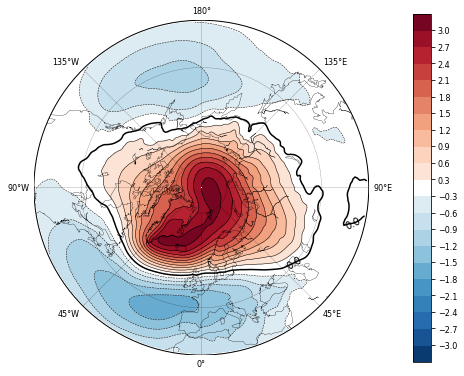

In [2]:
# Usual imports
import numpy as np
import xarray as xr
import pandas as pd
import polarplots as pp

# Load example data
ds=xr.open_dataset('pattern.nc', decode_times=False) 
mylat=ds['lat'].values
mylon=ds['lon'].values
myvar=ds['var151'][0,:,:].values

#np.shape(mylon)

# Simple plot, automatic color range and no customizations:
myfig=pp.polaranom(mylat,mylon,myvar,
               lat0=30,zeroline=1,contours=1,
                )

# Save figure:
myfig.savefig('test1.png', dpi=300)